In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train_1.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
df.shape

(145063, 551)

In [4]:
exog_campaign_eng=pd.read_csv('Exog_Campaign_eng')

In [5]:
exog_campaign_eng.shape

(550, 1)

In [6]:
exog_campaign_eng.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [7]:
df.Page.sample(20)

9008          Education_en.wikipedia.org_desktop_all-agents
128099    Format_de_papier_fr.wikipedia.org_all-access_s...
96075        Ed_Gein_es.wikipedia.org_mobile-web_all-agents
27015     Malika_Ménard_fr.wikipedia.org_all-access_all-...
3094                 宮心計_zh.wikipedia.org_all-access_spider
16037     Ураза-байрам_ru.wikipedia.org_mobile-web_all-a...
43701     Special:SkinDistributor_www.mediawiki.org_desk...
38706     NXT_TakeOver:_Brooklyn_II_en.wikipedia.org_all...
128286    Isabelle_Boulay_fr.wikipedia.org_all-access_sp...
73923     Kiefer_Sutherland_en.wikipedia.org_mobile-web_...
24363     Jean-Baptiste_Maunier_fr.wikipedia.org_all-acc...
55143     Date_de_naissance_de_Jésus_fr.wikipedia.org_mo...
20737     Help:Contents/ksh_www.mediawiki.org_all-access...
6943      Saison_5_d'American_Horror_Story_fr.wikipedia....
110314    Chill_Factore_en.wikipedia.org_all-access_all-...
46028     File:San_lorenzo_father_massa.jpg_commons.wiki...
43873     Category:Belief_commons.wikime

In [8]:
df['Page'].str.extract(r'[^_]+_[^_]+_[^_]+_([^_]+)').head(20)

,0
0,spider
1,spider
2,spider
3,spider
4,Love
5,spider
6,spider
7,spider
8,spider
9,spider


In [9]:
data=df.copy()

In [10]:
data.duplicated().sum()

0

In [11]:
data.dtypes.sample(5)

2015-07-25    float64
2015-11-13    float64
2016-12-07    float64
2016-01-06    float64
2016-10-04    float64
dtype: object

In [12]:
indexes=data.head(2).columns[1:][range(0,549,20)].values
indexes

array(['2015-07-01', '2015-07-21', '2015-08-10', '2015-08-30',
       '2015-09-19', '2015-10-09', '2015-10-29', '2015-11-18',
       '2015-12-08', '2015-12-28', '2016-01-17', '2016-02-06',
       '2016-02-26', '2016-03-17', '2016-04-06', '2016-04-26',
       '2016-05-16', '2016-06-05', '2016-06-25', '2016-07-15',
       '2016-08-04', '2016-08-24', '2016-09-13', '2016-10-03',
       '2016-10-23', '2016-11-12', '2016-12-02', '2016-12-22'],
      dtype=object)

## Checking Missing values

<Axes: >

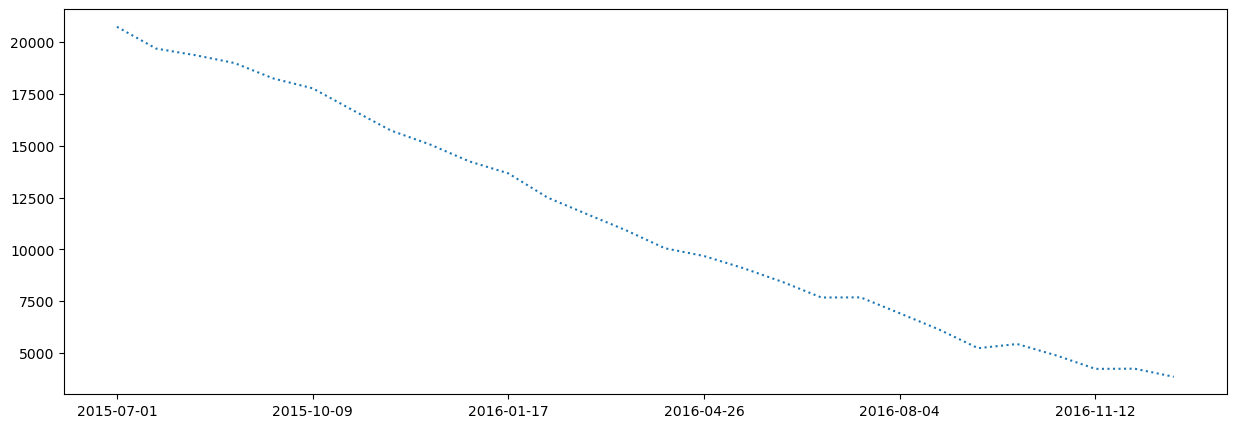

In [14]:
plt.figure(figsize=(15,5))
data.isna().sum()[indexes].plot(linestyle='dotted')

- We can see that with time there is a decrease in null values.
- Recent dates have lesser null values

In [16]:
# Replacing all the null values with 0
data.fillna(0,inplace=True)

In [17]:
data.isnull().sum()[indexes]

2015-07-01    0
2015-07-21    0
2015-08-10    0
2015-08-30    0
2015-09-19    0
2015-10-09    0
2015-10-29    0
2015-11-18    0
2015-12-08    0
2015-12-28    0
2016-01-17    0
2016-02-06    0
2016-02-26    0
2016-03-17    0
2016-04-06    0
2016-04-26    0
2016-05-16    0
2016-06-05    0
2016-06-25    0
2016-07-15    0
2016-08-04    0
2016-08-24    0
2016-09-13    0
2016-10-03    0
2016-10-23    0
2016-11-12    0
2016-12-02    0
2016-12-22    0
dtype: int64

# EDA

Extracting Language

In [20]:
data.Page[0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [21]:
import re

re.findall(r'_(.{2}).wikipedia.org_',"2Ne1_zh.wikipedia.org_all-access_spider")

['zh']

In [22]:
data.Page.str.findall(pat="_(.{2}).wikipedia.org_").sample(10)

87565     [ja]
95273     [es]
108324    [zh]
122890    [ja]
79099       []
34822     [en]
135502    [ja]
93842     [es]
89837     [ja]
68822     [de]
Name: Page, dtype: object

In [23]:
#Extracting Language
def Extract_Language(name):
    if len(re.findall(r'_(.{2}).wikipedia.org_',name)) ==1:
        return re.findall(r'_(.{2}).wikipedia.org_',name)[0]
    else:
        return 'Unknown'

In [24]:
data['Language']= data['Page'].map(Extract_Language)

In [25]:
data['Language'].unique()

array(['zh', 'fr', 'en', 'Unknown', 'ru', 'de', 'ja', 'es'], dtype=object)

In [26]:
dict_={'de':'German',
       'en':'English',
       'es':'Spanish',
       'fr':'French',
       'ja':'Japanese',
       'ru':'Russian',
       'zh':'Chinese',
       'Unknown':'Unknown_Language'}

data['Language']=data['Language'].map(dict_)

In [27]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,Chinese


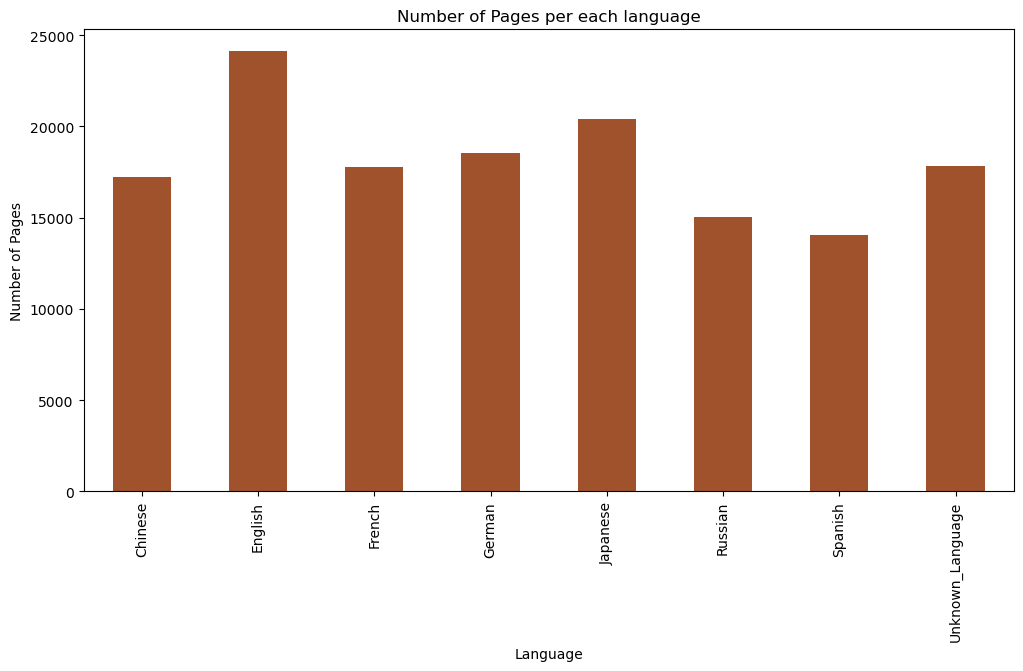

In [28]:
plt.figure(figsize=(12,6))

data.groupby('Language')['Page'].count().plot(kind='bar',color='sienna')
plt.xlabel('Language')
plt.ylabel('Number of Pages')
plt.title('Number of Pages per each language')
plt.show()

In [29]:
from locale import normalize
data['Language'].value_counts(normalize=True) *100

English             16.618986
Japanese            14.084225
German              12.785479
Unknown_Language    12.308445
French              12.271909
Chinese             11.876909
Russian             10.355501
Spanish              9.698545
Name: Language, dtype: float64

14.03% of pages have unknown language
18.94% of pages are in English which is the highest

# Extracting Access Type:

In [32]:
data['Access_Type']=data.Page.str.findall(r'all-acess|mobile-web|desktop').apply(lambda x: x[0] if len(x) > 0 else 'all-access')

In [33]:
# Normalize value counts to get proportions
access_type_counts = data["Access_Type"].value_counts(dropna=False, normalize=True)
print(access_type_counts)

all-access    0.512295
mobile-web    0.247748
desktop       0.239958
Name: Access_Type, dtype: float64


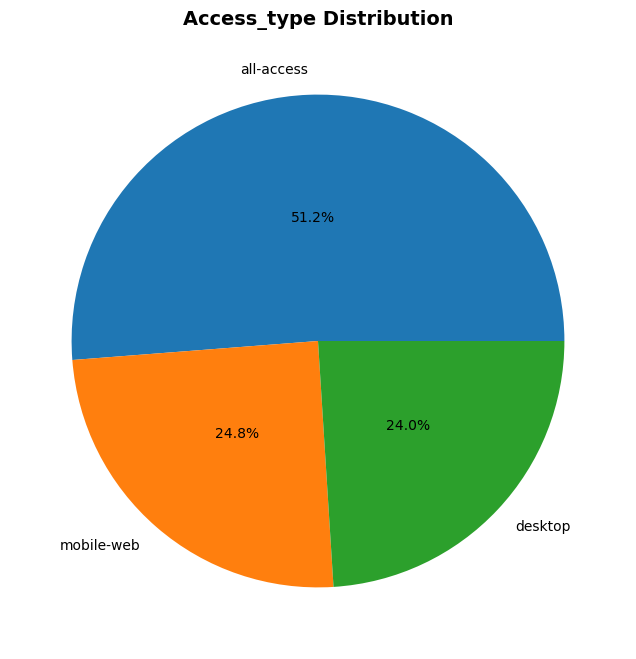

In [34]:
x= (data['Access_Type'].value_counts(dropna=False,normalize=True)*100).values
y=(data['Access_Type'].value_counts(dropna=False,normalize=True)*100).index

plt.figure(figsize=(10,8))
plt.pie(x,labels=y,radius=1,autopct='%1.1f%%',pctdistance=0.5)
plt.title(f'Access_type Distribution', fontsize=14,fontweight='bold')
plt.show()

In [35]:
# Extracting Access Origin

In [36]:
data.Page.sample(20)

47883       Olivia_Wilde_de.wikipedia.org_all-access_spider
122647          井上真央_ja.wikipedia.org_all-access_all-agents
102630          Берсерк_ru.wikipedia.org_desktop_all-agents
76489     Concussion_(2015_film)_en.wikipedia.org_mobile...
96108     Sucker_Punch_es.wikipedia.org_mobile-web_all-a...
4217          你的名字。_(專輯)_zh.wikipedia.org_all-access_spider
67720        Kasachstan_de.wikipedia.org_desktop_all-agents
131888    Liste_des_personnes_citées_dans_les_Panama_Pap...
77598     Category:Cameltoes_commons.wikimedia.org_mobil...
9749      Lucille_(guitar)_en.wikipedia.org_desktop_all-...
42051     Canelo_Álvarez_en.wikipedia.org_all-access_all...
115869    Sinus_und_Kosinus_de.wikipedia.org_mobile-web_...
72416     Juegos_Olímpicos_de_Pekín_2008_es.wikipedia.or...
22323     Universal_Language_Selector/WebFonts_www.media...
88272              キューバ_ja.wikipedia.org_desktop_all-agents
117611         Reign_de.wikipedia.org_mobile-web_all-agents
11272     Five_Nights_at_Freddy's_en.wik

In [37]:
data.Page.str.findall(r'spider|agents').apply(lambda x:x[0]).isna().sum()

0

In [38]:
data['Access_Origin']= data.Page.str.findall(r'spider|agents').apply(lambda x:x[0] if len(x) >0 else agents)

In [39]:
data['Access_Origin'].value_counts(dropna=False,normalize=True)*100

agents    75.932526
spider    24.067474
Name: Access_Origin, dtype: float64

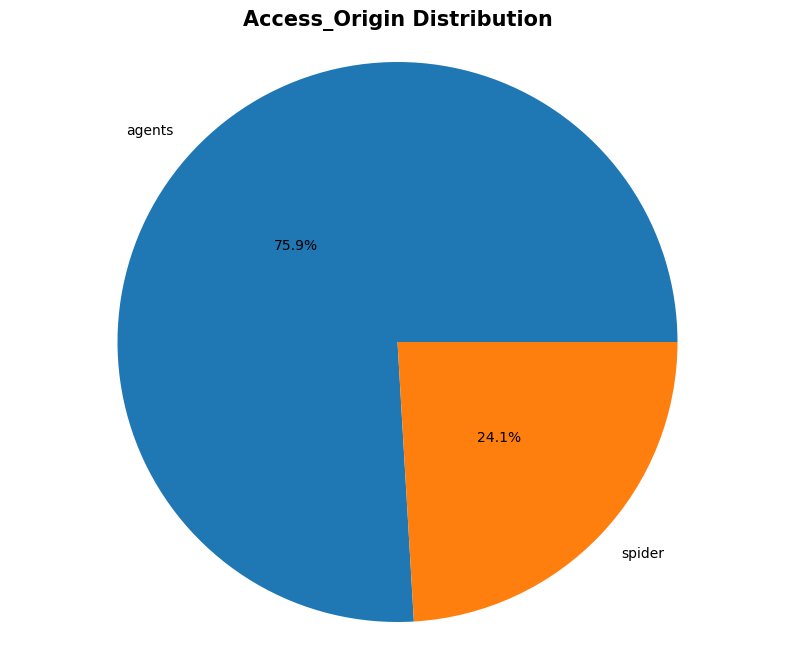

In [40]:
x = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).values
y = (data["Access_Origin"].value_counts(dropna= False, normalize=True) * 100).index
plt.figure(figsize=(10, 8))
plt.pie(x,labels= y,radius=1, autopct='%1.1f%%', pctdistance=0.5 )
plt.title(f'Access_Origin Distribution', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

In [41]:
data.groupby('Language').mean()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
Chinese,240.582042,240.941958,239.344071,241.653491,257.779674,259.114864,258.832260,265.589529,263.964420,274.414592,...,345.165129,340.420338,360.738580,381.322886,376.447443,376.019618,378.048639,350.719427,354.704452,365.579256
English,3513.862203,3502.511407,3325.357889,3462.054256,3575.520035,3849.736021,3643.523063,3437.871080,3517.459391,3497.571594,...,4997.991248,4683.314294,4971.831757,5140.463373,5770.371661,6040.680728,5860.227559,6245.127510,5201.783018,5127.916418
French,475.150994,478.202000,459.837659,491.508932,482.557746,502.741209,485.945399,476.998820,472.061903,445.495057,...,652.004719,639.459443,618.215931,666.639085,936.884788,858.413100,774.155769,752.712954,700.543422,646.258342
German,714.968405,705.229741,676.877231,621.145145,722.076185,794.832480,770.814256,782.077641,752.939990,701.702593,...,828.738017,839.025934,810.756187,1281.088532,1206.478029,1085.095379,1032.640804,994.657141,949.265649,893.013425
Japanese,580.647056,666.672801,602.289805,756.509177,725.720914,632.399148,615.184181,611.462337,596.067642,619.299300,...,675.104792,968.007733,856.605012,818.374725,779.114728,789.158680,790.500465,865.483236,952.018354,1197.239440
Russian,629.999601,640.902876,594.026295,558.728132,595.029157,640.986287,626.293436,623.360205,638.550726,731.252297,...,896.352017,884.841299,874.274597,1120.990347,1112.840833,1001.209426,931.987685,897.282452,803.271868,880.244508
Spanish,1085.972919,1037.814557,954.412680,896.050750,974.508210,1110.637145,1082.568342,1050.669557,1030.841282,937.129931,...,983.568129,935.082522,880.307911,903.643685,1195.481626,1133.367901,1178.290923,1112.171085,821.671405,787.399531
Unknown_Language,83.479922,87.471857,82.680538,70.572557,78.214562,89.720190,94.939457,99.096724,86.445477,87.353906,...,131.521983,164.889051,140.363764,164.455167,165.821563,147.038925,186.438029,147.297004,164.540577,143.951442


# Data Aggregation & Preparation for Time Series Modelling

In [43]:
#Interpolate data with Linear Method
interpolated_data=data.copy(deep=True)
interpolated_data.iloc[:,1:-5] = data.iloc[:,1:-5].interpolate(axis=1,limit_direction='forward',method='linear')

In [44]:
#Aggregate the pages by language and computes mean
agg_data_means=interpolated_data.groupby('Language')[interpolated_data.columns[1:-5]].mean().T
agg_data_means.drop(columns=['Unknown_Language'],inplace=True)
agg_data_means.index= pd.to_datetime(agg_data_means.index)

In [45]:
#Aggregate the pages by Language and compute median
agg_data_medians= interpolated_data.groupby('Language')[interpolated_data.columns[1:-5]].median().T
agg_data_medians.drop(columns=['Unknown_Language'],inplace=True)
agg_data_medians.index=pd.to_datetime(agg_data_medians.index)

In [46]:
#Aggregate the pages by Language and compute sum
agg_data_sum=interpolated_data.groupby('Language')[interpolated_data.columns[1:-5]].sum().T
agg_data_sum.drop(columns=['Unknown_Language'],inplace=True)
agg_data_sum.index=pd.to_datetime(agg_data_sum.index)

Text(0, 0.5, 'Daily Average Page Views')

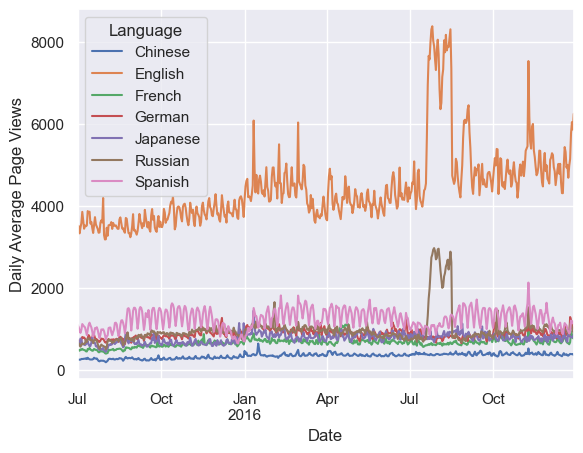

In [47]:
sns.set_theme()
agg_data_means.plot()
plt.xlabel('Date')
plt.ylabel('Daily Average Page Views')

Insights:

1. During the month of Aug 2016 there is a spike in daily average views of both English and Russian pages
2. A spike is also observed in Nov 2016. This is for English, Spanish, Russian and German as well
3. English average views seem to have a trend and seasonality whereas other languages have seasonality mostly

Text(0, 0.5, 'Daily Median Page Views')

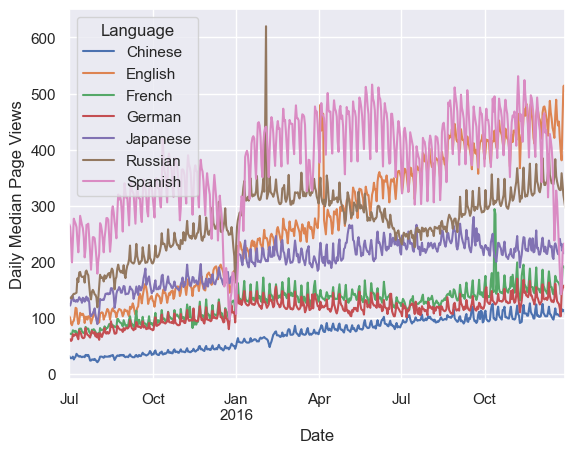

In [49]:
sns.set_theme()
agg_data_medians.plot()
plt.xlabel('Date')
plt.ylabel('Daily Median Page Views')

Insights:
1. In daily median views, Spanish language pages seem to be higher than other language pages
2. Spanish, Russian, and English median daily views had a drop.
3. In later months of 2016, english pages median daily views is on part with that of Spanish

Text(0, 0.5, 'Daily Total Page Views')

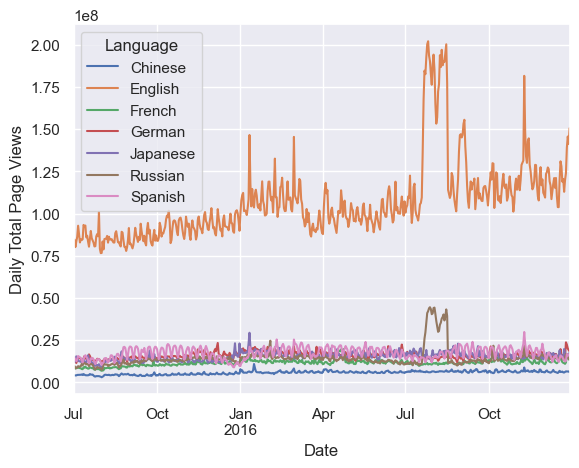

In [51]:
sns.set_theme()
agg_data_sum.plot()
plt.xlabel("Date")
plt.ylabel("Daily Total Page Views")

Insights:

1. Given that English has high number of pages, it is no surprise that total daily views of English pages is high too
2. Daily total views of spanish seem to have some seasonality

In [53]:
# Null Hypothesis : Data is not stationary
# Alternate Hypothesis : Data is stationary

import statsmodels.api as sm
def adFullerTest(data,alpha=0.05):

    """
    Given data series, outputs the result of adfuller test

    """
    testStatistic,p_value,*rest = sm.tsa.stattools.adfuller(data)

    if p_value < alpha:
        print(f'Signal is stationary:- p_value = {np.round(p_value,4)}')
    else:
        print(f'Signal is not stationary:- p_value= {np.round(p_value,4)}')

In [54]:
for language in agg_data_means.columns:
    print(language)
    adFullerTest(agg_data_means[language])
    print()

Chinese
Signal is not stationary:- p_value= 0.4506

English
Signal is not stationary:- p_value= 0.2276

French
Signal is not stationary:- p_value= 0.0625

German
Signal is not stationary:- p_value= 0.1412

Japanese
Signal is not stationary:- p_value= 0.0697

Russian
Signal is stationary:- p_value = 0.0019

Spanish
Signal is stationary:- p_value = 0.0235



Insights:
1. Spanish and Russian are stationary
2. Chinese, English, French, German,Japanese are not stationary

# Further Analysis on Aggregated English Data

In [57]:
English= agg_data_means['English'].copy()

<Axes: >

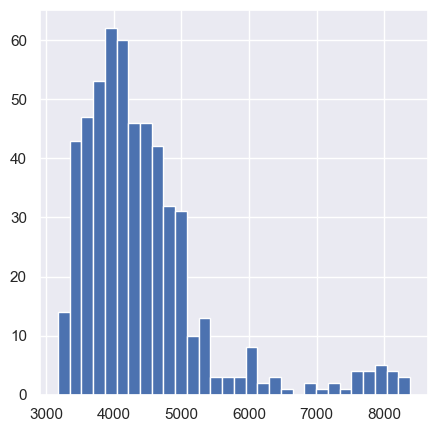

In [58]:
#Plotting the histogram for English
plt.figure(figsize=(5,5))
English.hist(bins=30)

<Axes: >

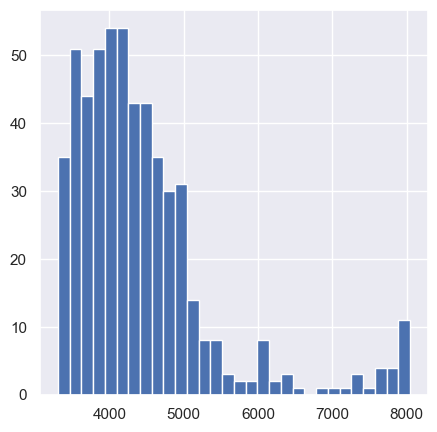

In [59]:
plt.figure(figsize=(5,5))
English_clipped=English.clip(lower=English.quantile(0.01),upper=English.quantile(0.99))
English_clipped.hist(bins=30)

Insights:

1. Clipped the series using quantile technique with lower & upper quantiles as 0.01,0.99.
2. Looking at the plots, clipping seems optional

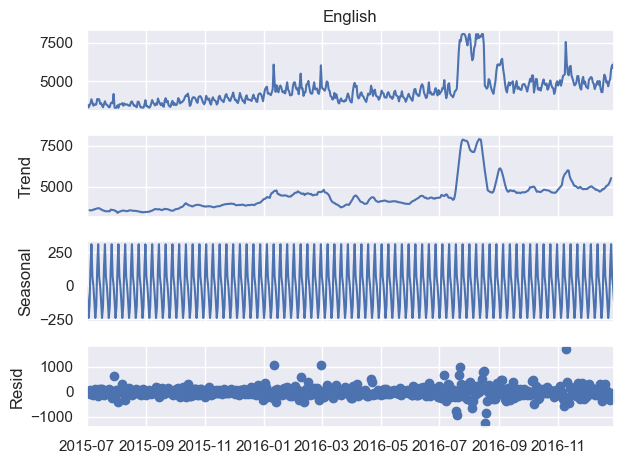

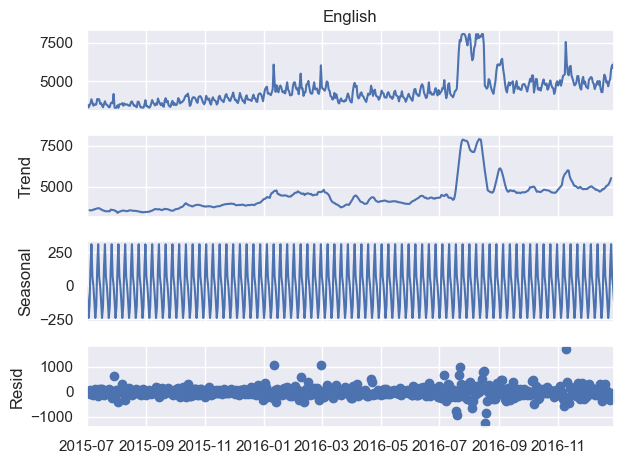

In [61]:
#let's decompose the English signal further to understand trend, seasonality and residuals
decomp_english=sm.tsa.seasonal_decompose(English_clipped)
decomp_english.plot()

<Axes: >

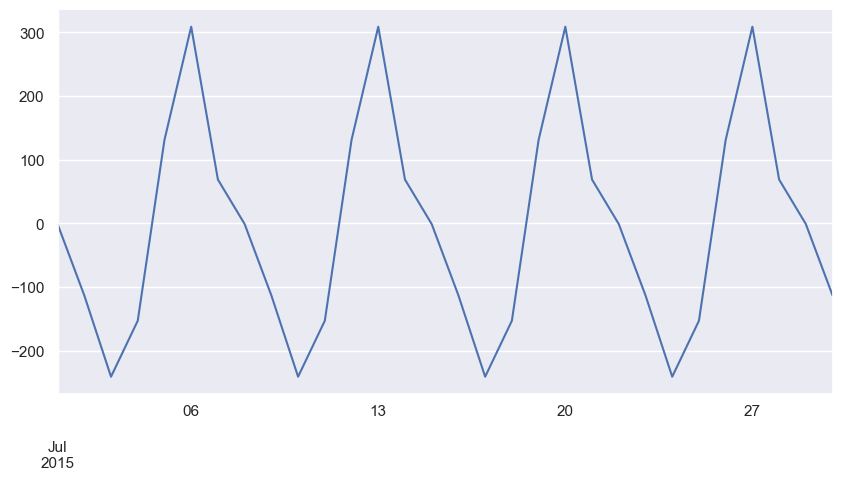

In [62]:
plt.figure(figsize=(10,5))
decomp_english.seasonal.head(30).plot()

<Axes: ylabel='Density'>

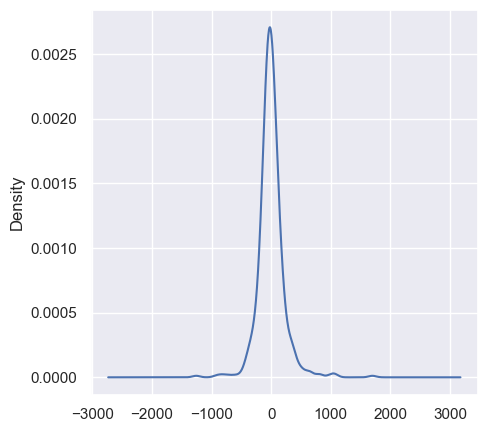

In [63]:
plt.figure(figsize=(5,5))
decomp_english.resid.plot(kind='kde')

Insights:

1. Non stationary signals can be written as summation or multiplication of trend, seasonality, and residuals. As per the plots above, there is clearly seasonality in the data - Pattern repeats every 7 days. There is no clear Trend - increases, decreases, constant
2. Residual is normally distributed- No need to break down residual further

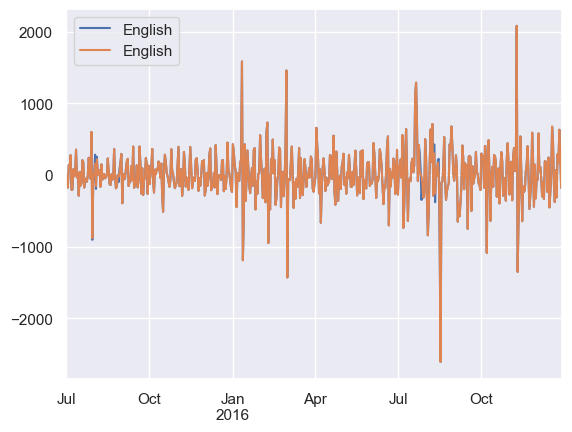

In [65]:
English.diff().plot()
English_clipped.diff().plot()
plt.legend()

In [66]:
#Check to see if the signal is stationary
adFullerTest(English_clipped.diff().dropna())

Signal is stationary:- p_value = 0.0


In [67]:
#Save the clipped data to a different variable
Stationary_English_Clipped= English_clipped.diff().dropna()

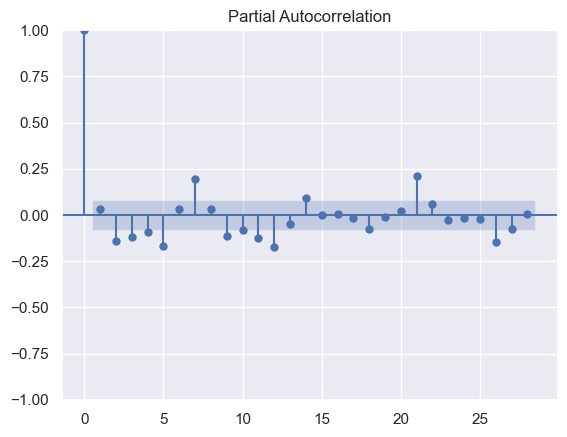

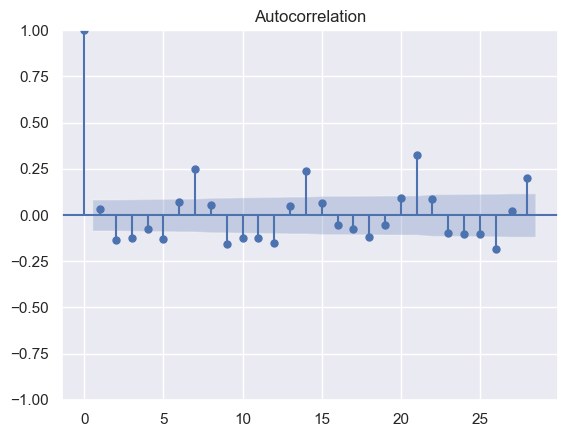

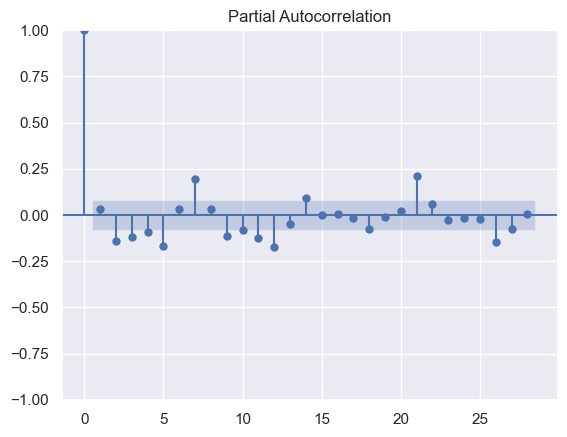

In [68]:
#Plotting auto correlation and partial auto correlation plots
sm.tsa.graphics.plot_acf(Stationary_English_Clipped)
sm.tsa.graphics.plot_pacf(Stationary_English_Clipped)

Insights:

1. In neither acf or pacf plots there is an exponential decaying trend. So simple auto regression or moving avg wouldn't give better results
2. ARIMA,SARIMA,SARIMAX models would definitely do better than base models
3. You can observe seasonality of 7 days in above plots

In [70]:
import warnings
warnings.filterwarnings(action='ignore')

In [71]:
from sklearn.metrics import(
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

#Create a function to calculate all metrics
def performance(actual,predicted):
    print('MAE:', round(mae(actual,predicted),3))
    print('RMSE:',round(mse(actual,predicted)**0.5,3))
    print('MAPE:',round(mape(actual,predicted),3))

# Experimenting with Different Modelling Techniques

Exponential Smoothing

In [74]:
X_train=English_clipped[English_clipped.index <= English_clipped.index[-35]]
X_test=English_clipped[English_clipped.index > English_clipped.index[-35]]

In [75]:
ExpModel= sm.tsa.ExponentialSmoothing(X_train,seasonal='add',trend='add')
ExpModel=ExpModel.fit()

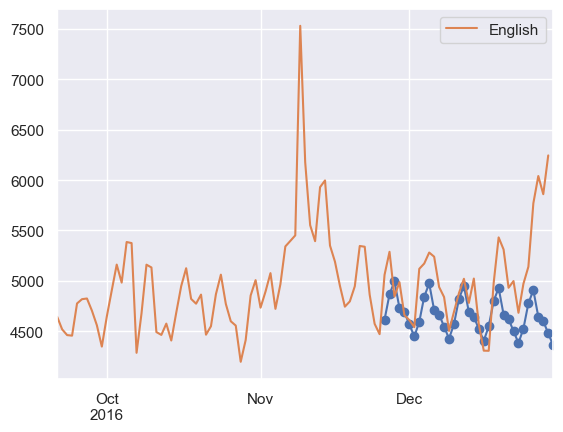

In [76]:
PredEnglish=ExpModel.forecast(35)
PredEnglish.plot(style='-o')
English_clipped.tail(100).plot()
plt.legend()

In [77]:
performance(English_clipped[-35:],PredEnglish)

MAE: 425.244
RMSE: 601.637
MAPE: 0.08


Insights:
1. Exponential model is able to predict the data with an MAPE of ~8%.
2. Lets check futher to see if other models do any better

# ARIMA

In [80]:
def ARIMA(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0)):
    import statsmodels.api as sm

    X_train,X_test=df.iloc[:-idx],df.iloc[-idx:]

    model=sm.tsa.ARIMA(endog=X_train,order=order,seasonal_order= seasonal_order)
    result=model.fit()

    predTest=result.forecast(len(X_test))

    predTest.plot(style='-o',label='Prediction')
    df.tail(100).plot(label='Original')
    plt.ylabel('Views')
    plt.xlabel('Date')
    plt.legend();

    performance(X_test,predTest)
    print()

MAE: 329.1
RMSE: 443.041
MAPE: 0.064



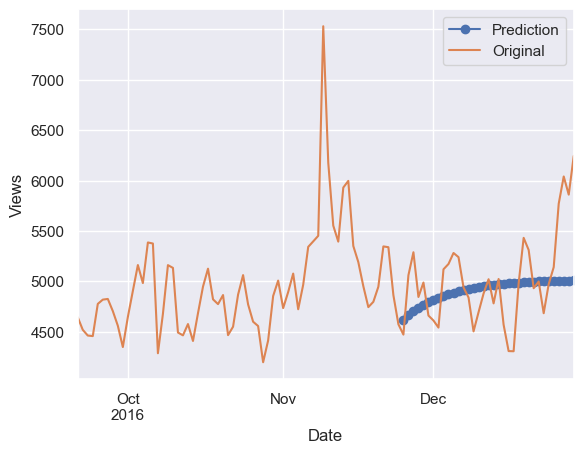

In [81]:
ARIMA(English_clipped,idx=35,order=(1,1,1))

Insights:

1. ARIMA with p,d,q as 1,1,1 is able to predict the recent 35 days of data with ~6.4% MAPE

# SARIMAX

1. Below function can be used with and without exogenous variable
2. Based on the order,seasonal_order it can work as AR,MA,ARIMA,SARIMA,SARIMAX
3. Seasonal Auto Regressive Integrated Moving Avg with Exogenous Regressors that use Moving Avg of errors, Auto Regression on historical signal values,considers seasonality and external data to predict the future values.

In [85]:
def SARIMAX(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):
    
    import statsmodels.api as sm
        
    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]
    
    if exog is not None:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]
        
    model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
    result = model.fit(disp=False)
    predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)
    
    if not batch:
        
        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)
        
    return result.aic

Insights:

- With p,d,q and P,D,Q,m as 1,1,1 and 1,1,1,7, we got a model that predicts with an MAPE of 7%
- We can do a grid search on above parameters to find the optimal p,d,q,P,D,Q values

In [98]:
from itertools import product
from pprint import pprint
import heapq

In [148]:
 def SARIMAX_mape(df,idx,order=(0,0,0),seasonal_order=(0,0,0,0),exog= None, batch=False):
    
    import statsmodels.api as sm
        
    X_train, X_test = df.iloc[:-idx],df.iloc[-idx:]
    
    if exog is not None:
        exog_train = exog[:-idx]
        exog_test = exog[-idx:]
    else:
        exog_train,exog_test =  None,None
        
    model = sm.tsa.SARIMAX(endog=X_train,
                           exog=exog_train,
                           order=order,
                           seasonal_order=seasonal_order,
                          )
    result = model.fit(disp=False)
    predTest  = result.forecast(len(X_test),dynamic=False,exog=exog_test)
    
    if not batch:
        
        predTest.plot(style="-*",label="Prediction")
        df.tail(100).plot(label="Original")
        plt.ylabel("Views")
        plt.xlabel("Date")
        plt.legend();

        performance(X_test,predTest)
        
    mape_val = round(mape(X_test, predTest), 3)
        
    return mape_val

In [150]:
# This grid search is for English series with exogenous variable
# Based on how it works, we can replicate it to other languages 

p = d = q = range(1,3)

#Using product to create all permuatations of p,d,q,P,D,Q
pdq = list(product(p,d,q))
PDQ = [(x[0],x[1],x[2],7) for x in pdq]

all_results_mape = []

for order in pdq:
    for seasonal in PDQ:
        
        try:
            # MAPE is stored in the result
            result = SARIMAX_mape(df=English_clipped,
                             idx=35,order= order,seasonal_order=seasonal,exog=exog,batch=True);

            
            all_results_mape.append((order,seasonal,-result))
            print(order,seasonal,result)
        
        except:
            print(f"Skipped {order},{seasonal}")
            continue
        
# We store the MAPE values as negative to use nlargest function to find the best parameters
top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
print(top5_results_mape)

Skipped (1, 1, 1),(1, 1, 1, 7)
Skipped (1, 1, 1),(1, 1, 2, 7)
Skipped (1, 1, 1),(1, 2, 1, 7)
Skipped (1, 1, 1),(1, 2, 2, 7)
Skipped (1, 1, 1),(2, 1, 1, 7)
Skipped (1, 1, 1),(2, 1, 2, 7)
Skipped (1, 1, 1),(2, 2, 1, 7)
Skipped (1, 1, 1),(2, 2, 2, 7)
Skipped (1, 1, 2),(1, 1, 1, 7)
Skipped (1, 1, 2),(1, 1, 2, 7)
Skipped (1, 1, 2),(1, 2, 1, 7)
Skipped (1, 1, 2),(1, 2, 2, 7)
Skipped (1, 1, 2),(2, 1, 1, 7)
Skipped (1, 1, 2),(2, 1, 2, 7)
Skipped (1, 1, 2),(2, 2, 1, 7)
Skipped (1, 1, 2),(2, 2, 2, 7)
Skipped (1, 2, 1),(1, 1, 1, 7)
Skipped (1, 2, 1),(1, 1, 2, 7)
Skipped (1, 2, 1),(1, 2, 1, 7)
Skipped (1, 2, 1),(1, 2, 2, 7)
Skipped (1, 2, 1),(2, 1, 1, 7)
Skipped (1, 2, 1),(2, 1, 2, 7)
Skipped (1, 2, 1),(2, 2, 1, 7)
Skipped (1, 2, 1),(2, 2, 2, 7)
Skipped (1, 2, 2),(1, 1, 1, 7)
Skipped (1, 2, 2),(1, 1, 2, 7)
Skipped (1, 2, 2),(1, 2, 1, 7)
Skipped (1, 2, 2),(1, 2, 2, 7)
Skipped (1, 2, 2),(2, 1, 1, 7)
Skipped (1, 2, 2),(2, 1, 2, 7)
Skipped (1, 2, 2),(2, 2, 1, 7)
Skipped (1, 2, 2),(2, 2, 2, 7)
Skipped 

In [104]:
# Pipeline function for different languages

# 1. Dataset is available in agg_data_means[language]
# 2. Function to call Grid Search on SARIMA - EXOG is not passed
# 3. Store top 5 results for each language in Dictionary

def grid_search_sarimax(df, p, d, q, m, exog=None, idx=35):
    
    p,d,q = p,d,q
    pdq = list(product(p,d,q))
    PDQ = [(x[0],x[1],x[2],m) for x in pdq]

    all_results_mape = []

    for order in pdq:
        for seasonal in PDQ:

            try:
                result = SARIMAX_mape(df=df,
                                 idx=idx,order= order,seasonal_order=seasonal,exog=exog,batch=True);


                all_results_mape.append((order,seasonal,-result))
                print(f"order:{order},seasonal:{seasonal},MAPE:{result}")

            except:
                print(f"Skipped params: {order},{seasonal}")
                continue


    top5_results_mape = heapq.nlargest(5, all_results_mape,lambda k:k[2])
    return top5_results_mape

top5results_by_lang = {}

# for different languages
for language in agg_data_means.columns:
    
    # Dataset is available in agg_data_means[language]
    df_lang = f"df_{language}"
    df_lang = agg_data_means[language]
    
    
    # Call Grid Search
    print(f"Language:{language}")
    output = grid_search_sarimax(df_lang, p=range(1,3), d=range(1,3), q=range(1,3), m=7, exog=None, idx=35)
    top5results_by_lang[language] = output

pprint(top5results_by_lang)

Language:Chinese
order:(1, 1, 1),seasonal:(1, 1, 1, 7),MAPE:0.073
order:(1, 1, 1),seasonal:(1, 1, 2, 7),MAPE:0.071
order:(1, 1, 1),seasonal:(1, 2, 1, 7),MAPE:0.048
order:(1, 1, 1),seasonal:(1, 2, 2, 7),MAPE:0.054
order:(1, 1, 1),seasonal:(2, 1, 1, 7),MAPE:0.073
order:(1, 1, 1),seasonal:(2, 1, 2, 7),MAPE:0.074
order:(1, 1, 1),seasonal:(2, 2, 1, 7),MAPE:0.063
order:(1, 1, 1),seasonal:(2, 2, 2, 7),MAPE:0.049
order:(1, 1, 2),seasonal:(1, 1, 1, 7),MAPE:0.073
order:(1, 1, 2),seasonal:(1, 1, 2, 7),MAPE:0.071
order:(1, 1, 2),seasonal:(1, 2, 1, 7),MAPE:0.047
order:(1, 1, 2),seasonal:(1, 2, 2, 7),MAPE:0.046
order:(1, 1, 2),seasonal:(2, 1, 1, 7),MAPE:0.073
order:(1, 1, 2),seasonal:(2, 1, 2, 7),MAPE:0.073
order:(1, 1, 2),seasonal:(2, 2, 1, 7),MAPE:0.045
Skipped params: (1, 1, 2),(2, 2, 2, 7)
order:(1, 2, 1),seasonal:(1, 1, 1, 7),MAPE:0.034
order:(1, 2, 1),seasonal:(1, 1, 2, 7),MAPE:0.035
order:(1, 2, 1),seasonal:(1, 2, 1, 7),MAPE:0.252
order:(1, 2, 1),seasonal:(1, 2, 2, 7),MAPE:0.324
order:(1, 2, 

# Chinese

MAE: 17.634
RMSE: 21.554
MAPE: 0.048


0.048

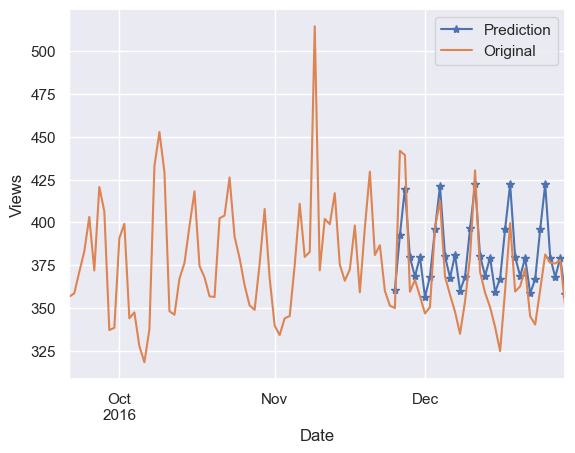

In [106]:
order,seasonal=(2,1,1),(2,2,2,7)
SARIMAX_mape(df=agg_data_means['Chinese'],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# English

MAE: 2295.84
RMSE: 2653.682
MAPE: 0.448


0.448

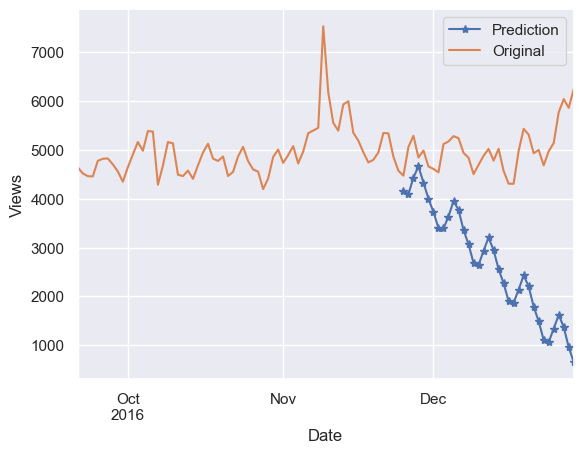

In [108]:
order,seasonal=(1,2,2),(1,2,1,7)
SARIMAX_mape(df=agg_data_means['English'],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# German

MAE: 65.037
RMSE: 112.796
MAPE: 0.063


0.063

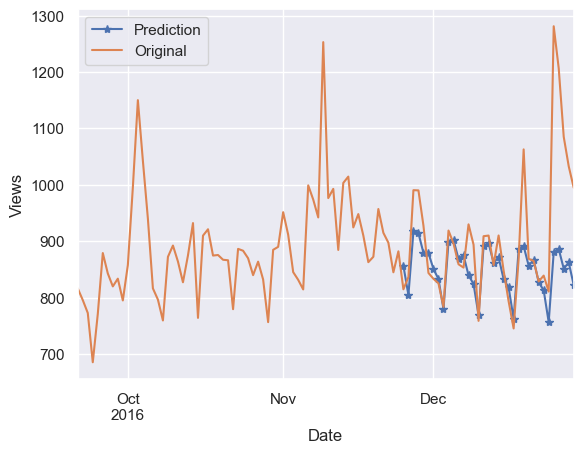

In [110]:
order,seasonal=(1,1,1),(2,2,2,7)
SARIMAX_mape(df=agg_data_means['German'],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# Russian

MAE: 62.679
RMSE: 78.133
MAPE: 0.062


0.062

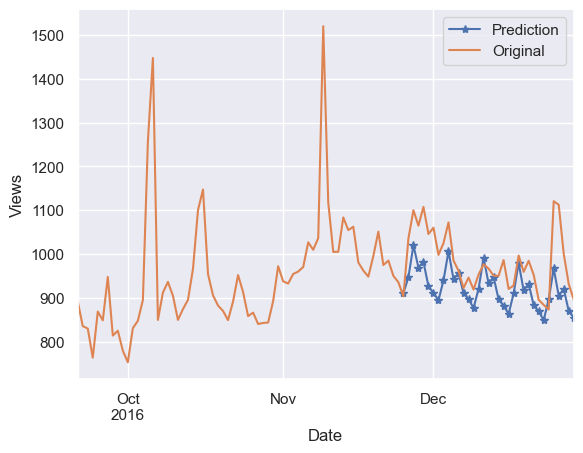

In [122]:
order,seasonal=(2,1,1),(1,2,1,7)
SARIMAX_mape(df=agg_data_means['Russian'],idx=35,order=order,seasonal_order=seasonal,exog=None,batch=False)

# Spanish

MAE: 472.974
RMSE: 489.187
MAPE: 0.451


0.451

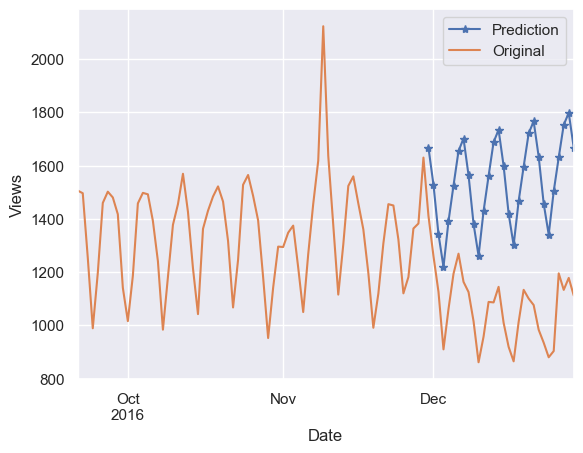

In [123]:
order, seasonal = (1,1,0),(1,0,1,7)
SARIMAX_mape(df=agg_data_means["Spanish"],idx=30,order= order,seasonal_order=seasonal,exog=None,batch=False)

Insights:

1. As shown above, average pages views for each language are predicted using the best parameters from Grid Search on SARIMAX without exogenous variable
2. MAPE of English increased by ~2% without inclusion of campaign data during training
3. For Spanish, we did well in prediction of last 30 days than last 35 days

# Prophet

In [126]:
!pip install prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [127]:
#prepare the data for using prophet
prophet_input=English_clipped.reset_index().rename(columns={"index":"ds","English":"y"})
train_data,test_data=prophet_input.iloc[:-35],prophet_input.iloc[-35:]

In [130]:
#Predict with 95% confidence interval
fbmodel=Prophet(weekly_seasonality=True,interval_width=0.95)
fbmodel.fit(train_data)

22:39:42 - cmdstanpy - INFO - Chain [1] start processing
22:39:42 - cmdstanpy - INFO - Chain [1] done processing


In [132]:
#This is to create time series dataframe automatically
forecast_period=fbmodel.make_future_dataframe(periods=35,freq='D',include_history=True)

In [134]:
#Store the forecast
prophet_forecast=fbmodel.predict(forecast_period)

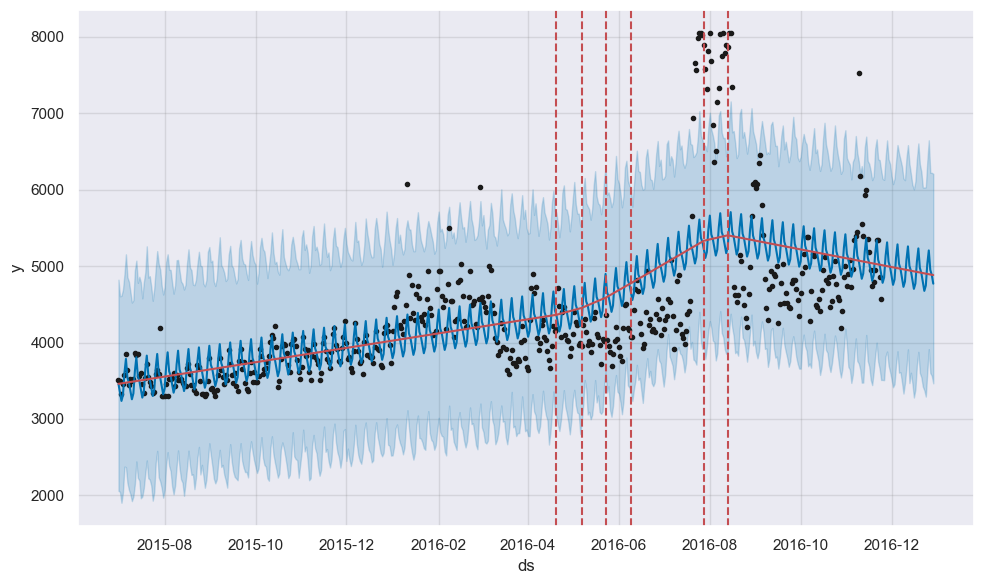

In [136]:
#Plot the changepoints, forecast along with confidence interval
fig=fbmodel.plot(prophet_forecast,uncertainty=True)
a=add_changepoints_to_plot(fig.gca(),fbmodel,prophet_forecast)

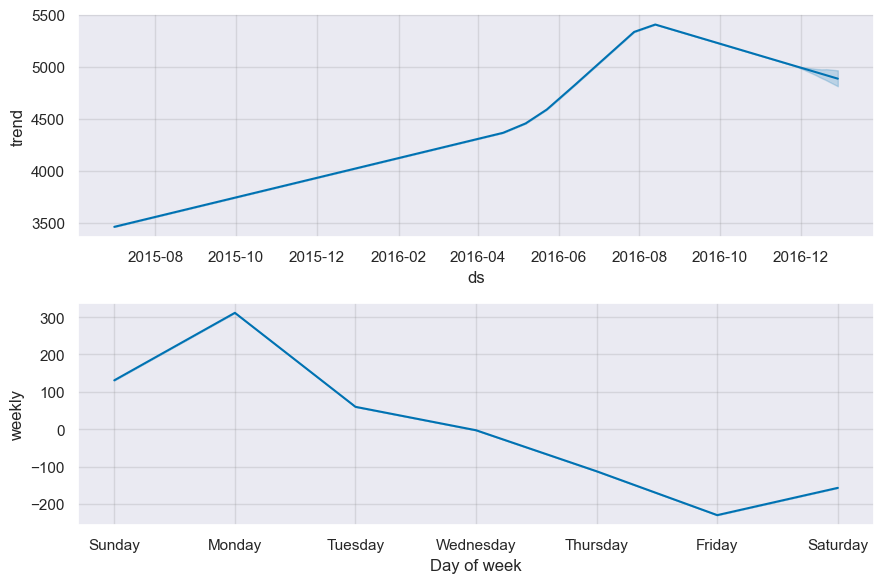

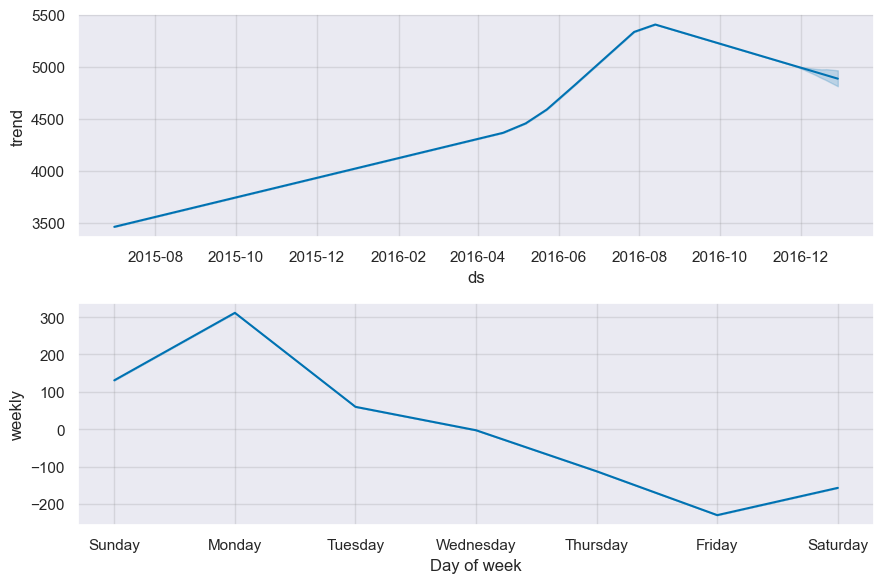

In [146]:
fbmodel.plot_components(prophet_forecast)

In [140]:
performance(test_data['y'].values,prophet_forecast['yhat'][-35:].values)

MAE: 288.679
RMSE: 424.178
MAPE: 0.055


Insights:

- Without exogenous variables and not much tweaking, it was able to find a model that predicts avg daily pages views with MAPE of ~5.9%

# Inferences :
1. There are also mediawiki & commons.wikimedia pages that host media are available in the dataset.
2. Of the pages from 7 different languages, English has the highest proportion, closely followed by Japanese. Rest of the languages roughly have same proportion of ~12%.
3. AccessOrigin is spider for ~24% of the pages and all-agents for ~76%.
4. AccessType is all-acess for about 50% of the pages. Then for desktop & mobile-web is ~25% each.
5. During the months of August 2016, there is a spike in daily average views of both English & Russian pages.
6. Also, a spike is observed in Nov,2016. This time for pages in Spanish, Russian, and German as well.
7. English average views seem to have trend & seasonality where as other languages have seasonality mostly.
8. In daily median views, Spanish language pages seem to be higher than other language pages.
9. Spanish, Russian, and English median daily views had a drop.
10. In later months of 2016, english pages median daily views is on part with that of Spanish.

# Recommendations:
1. English has high average daily views compared to other languages. Recommend running more ads in English pages.
2. There are more than 50% of pages with all-access compared to desktop & mobile-web alone.
3. Knowing the language for mediawiki & commons.wikimedia would enhance our training data further.
4. Like campaign data for English pages, availability of such exogenous data would improve model predictions.
5. With more time and resources, we can experiment with prophet parameters to bring better MAPE values.